# JALANKAN DALAM PYTHON VERSION 3.6

In [1]:
# DOCUMENTATION TENSORFLOW https://docs.microsoft.com/en-us/windows/ai/directml/gpu-faq#how-do-i-use-the--dml-visible-devices--environment-variable-to-control-which-gpu-s--get-used-by-directml
# NGELIHAT TENSORFLOW UNTUK PENGGUNAAN GPU PADA JUPYTER NOTEBOOK BERFUNGSI
# ATAU TIDAK

## Untuk downgrade tensorflow ke versi 1.15.3, ga perlu pip uninstall, karena pip udah otomatis langsung ganti ke versi yang dipilih pada saat pip install, jadi tinggal jalanin aja kodingan di bawah ini
# pip install tensorflow==1.15.3 --user

# import os

# #See devices        
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

import tensorflow as tf 


tf.debugging.set_log_device_placement(True) 
tf.enable_eager_execution() 

# Explicitly place tensors on the DirectML device 

with tf.device('/DML:0'): 
  a = tf.constant([1.0, 2.0, 3.0]) 
  b = tf.constant([4.0, 5.0, 6.0]) 

c = tf.add(a, b) 

print(c)

# import tensorflow.compat.v1 as tf 

# tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 

# print(tf.add([1.0, 2.0], [3.0, 4.0])) 

Executing op Add in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Add in device /job:localhost/replica:0/task:0/device:DML:0
tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)


In [2]:
# INISIALISASI LIBRARY

# pip install -U scikit-learn
# from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np
import re
import joblib
import ember
import lightgbm as lgb
import xgboost

# from dash import dcc
from numpy import mean, std
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.experimental import enable_halving_search_cv 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier

 
# np.array(arraynya).mean()

In [3]:
ember = pd.read_json('ember_dataset_2017_1/ember/train_features_0.jsonl', lines = True)

In [4]:
ember.head(1)

sha256 appeared  label  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12      0   

                                           histogram  \
0  [45521, 13095, 12167, 12496, 12429, 11709, 118...   

                                         byteentropy  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                             strings  \
0  {'numstrings': 14573, 'avlength': 5.9720716393...   

                                             general  \
0  {'size': 3101705, 'vsize': 380928, 'has_debug'...   

                                              header  \
0  {'coff': {'timestamp': 1124149349, 'machine': ...   

                                             section  \
0  {'entry': '.text', 'sections': [{'name': '.tex...   

                                             imports exports  
0  {'KERNEL32.dll': ['SetFileTime', 'CompareFileT...      []

sha256 appeared  label  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12      0   

                                           histogram  \
0  [45521, 13095, 12167, 12496, 12429, 11709, 118...   

                                         byteentropy  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                             strings  \
0  {'numstrings': 14573, 'avlength': 5.9720716393...   

                                             general  \
0  {'size': 3101705, 'vsize': 380928, 'has_debug'...   

                                              header  \
0  {'coff': {'timestamp': 1124149349, 'machine': ...   

                                             section  \
0  {'entry': '.text', 'sections': [{'name': '.tex...   

                                             imports exports  
0  {'KERNEL32.dll': ['SetFileTime', 'CompareFileT...      []

In [5]:
df_columns = pd.read_csv('Bodmas/ember_2381_feature_names.txt', delimiter='\n')
df_columns = list(df_columns['0'])

In [6]:
# DATA PREPROCESSING

import numpy as np

filename = 'Bodmas/bodmas.npz'
data = np.load(filename)
X = data['X']  # all the feature vectors
y = data['y']  # labels, 0 as benign, 1 as malicious
# print(data.files)

# metadata = pd.read_csv('Bodmas/bodmas_metadata.csv')
# metadata
# df['y'].unique()

In [7]:
# INISIALISASI VARIABEL X DAN Y

X = pd.DataFrame(X, columns=df_columns)
y = pd.DataFrame(y)

In [8]:
# INISIALISASI VARIABEL DATAFRAME DF

df = pd.DataFrame(X)
df['Label'] = pd.DataFrame(y)
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df.head(1)

ByteHistorgram0  ByteHistorgram1  ByteHistorgram2  ByteHistorgram3  \
0         0.056742         0.008017         0.007762         0.005466   

   ByteHistorgram4  ByteHistorgram5  ByteHistorgram6  ByteHistorgram7  \
0         0.007762         0.004446          0.00543         0.003061   

   ByteHistorgram8  ByteHistorgram9  ...  virtualsizeofdatadirectories10  \
0         0.009475         0.006305  ...                             0.0   

   sizeofdatadirectories11  virtualsizeofdatadirectories11  \
0                      0.0                             0.0   

   sizeofdatadirectories12  virtualsizeofdatadirectories12  \
0                      0.0                             0.0   

   sizeofdatadirectories13  virtualsizeofdatadirectories13  \
0                      0.0                             0.0   

   sizeofdatadirectories14  virtualsizeofdatadirectories14  Label  
0                      0.0                             0.0      0  

[1 rows x 2382 columns]

ByteHistorgram0  ByteHistorgram1  ByteHistorgram2  ByteHistorgram3  \
0         0.056742         0.008017         0.007762         0.005466   

   ByteHistorgram4  ByteHistorgram5  ByteHistorgram6  ByteHistorgram7  \
0         0.007762         0.004446          0.00543         0.003061   

   ByteHistorgram8  ByteHistorgram9  ...  virtualsizeofdatadirectories10  \
0         0.009475         0.006305  ...                             0.0   

   sizeofdatadirectories11  virtualsizeofdatadirectories11  \
0                      0.0                             0.0   

   sizeofdatadirectories12  virtualsizeofdatadirectories12  \
0                      0.0                             0.0   

   sizeofdatadirectories13  virtualsizeofdatadirectories13  \
0                      0.0                             0.0   

   sizeofdatadirectories14  virtualsizeofdatadirectories14  Label  
0                      0.0                             0.0      0  

[1 rows x 2382 columns]

In [9]:
group_label = df.groupby(["Label"]).count().reset_index()

alt.Chart(group_label).mark_bar().encode(
    alt.X('Label:O', axis=alt.Axis(title='Label')),
    alt.Y('ByteHistorgram0:Q', axis=alt.Axis(title='Number of samples')),
    alt.Color('Label:N', scale=alt.Scale(range=["#3333ff", "#ff3333"]), legend=alt.Legend(values=["benign", "malicious"]))
)

alt.Chart(...)

alt.Chart(...)

In [10]:
# MEMILIH FEATURE YANG MEMILIKI NILAI VARIANCE NYA 0

### It will drop low variance features towards the dataset

thresh = VarianceThreshold(threshold=0)
thresh.fit(df)
thresh.get_support()

### columns that have 0 threshold
columns_not_used = [column for column in df.columns if column not in df.columns[thresh.get_support()]]

# # print(len(columns_not_used))
# print('feature yang threshold nya 0: ')
# for feature in columns_not_used:
#   print(feature)

In [11]:
# NGE DROP FEATURE YANG MEMILIKI NILAI VARIANCE NYA 0

# Feature Selection Using Correlation Between Feature

df = df.drop(columns_not_used,axis=1)

# DROP DATA YANG KOSONG
df = df.dropna()
df.shape
# df.isnull().sum().sum()
X = df.drop(['Label'], axis=1)
y = df['Label']

In [12]:
# TRAIN TEST SPLIT DATA

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0,test_size=0.2)

In [36]:
# Menyimpan X_test untuk mengetes nilai akurasi pada data yang akan diprediksi di masa depan

X_test.to_csv('Web Application For Machine Learning\X_test.csv')
y_test.to_csv('Web Application For Machine Learning\y_test.csv')

In [13]:
# # EXPLORATORY DATA MENGGUNAKAN D-TALE

# import dtale
# import dtale.global_state as global_state

# global_state.set_chart_settings({'scatter_points': 134435, '3d_points': 134435})
# dtale.show(df)

In [14]:
%%time

# SELEKSI FITUR MENGGUNAKAN RANDOM FOREST

sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train.values.ravel())
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

Wall time: 3min 40s
Wall time: 3min 40s


448

448

In [15]:
# NGEDROP FEATURE YANG TIDAK TERPAKAI SESUAI DENGAN HASIL SELEKSI FITUR

columns_train_not_used = [column for column in X_train.columns if column not in selected_feat]
X_train = X_train.drop(columns_train_not_used,axis=1)
X_test = X_test.drop(columns_train_not_used,axis=1)

In [16]:
# Menyimpan hasil seleksi fitur ke dalam file output.txt

with open('Web Application For Machine Learning\output.txt', 'w') as txt_file:
    txt_file.write('0\n')
    for row in X_train.columns:
        txt_file.write("".join(row) + '\n')

In [17]:
# # Standardization Data (StandardScaler() ternyata udah pakai z-score, jadi Standardization StandardScaler itu sama dengan Standarisasi data menggunakan Z-SCORE)

# scaler = StandardScaler() # where X is your data to be scaled
# X_train = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train)

# X_train.head()

In [18]:
# %%time

# # Adaboost, Gradient Boosting

# AB = AdaBoostClassifier(random_state=0)
# AB.fit(X_train,y_train)
# AB_pred = AB.predict(X_test)
# print('AdaBoost: \n')
# print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,AB_pred)*100, "%")

# GB = GradientBoostingClassifier(random_state=0)
# GB.fit(X_train,y_train)
# GB_pred = GB.predict(X_test)
# print('GradienBoosting: \n')
# print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,GB_pred)*100, "%")

In [19]:
%%time

# Adaboost

AB = AdaBoostClassifier(random_state=0)
AB.fit(X_train,y_train)
AB_pred = AB.predict(X_test)
print('AdaBoost: \n')
print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,AB_pred)*100, "%")


AdaBoost: 

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.98     15428
     Malware       0.97      0.98      0.97     11459

    accuracy                           0.98     26887
   macro avg       0.98      0.98      0.98     26887
weighted avg       0.98      0.98      0.98     26887

97.81306951314762 %
Wall time: 2min 49s
AdaBoost: 

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.98     15428
     Malware       0.97      0.98      0.97     11459

    accuracy                           0.98     26887
   macro avg       0.98      0.98      0.98     26887
weighted avg       0.98      0.98      0.98     26887

97.81306951314762 %
Wall time: 2min 49s


In [20]:
# # Adaboost

# AB = AdaBoostClassifier()
# # AB.fit(X_train,y_train)
# # AB_pred = AB.predict(X_test)
# # print('AdaBoost: \n')
# # print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
# # print(accuracy_score(y_test,AB_pred)*100, "%")

# # HyperParameter Tuning Adaboost

# param_grid_AB = {
#     "n_estimators": [50,100,1000,2000],
#     "learning_rate": [1.0,2.0,3.0,4.0]
# }

# GSCV_AB = HalvingRandomSearchCV(
#     estimator=AB,
#     param_distributions = param_grid_AB,
#     scoring='accuracy',
#     random_state=0
# )

# GSCV_AB.fit(X_train,y_train)
# print(GSCV_AB.best_score_)
# print(GSCV_AB.best_estimator_.getparams())

In [21]:
# LightGBM Classifier

LGBM = LGBMClassifier()
LGBM.fit(X_train,y_train)
LGBM_pred = LGBM.predict(X_test)
print('AdaBoost: \n')
print(classification_report(y_test, LGBM_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,LGBM_pred)*100, "%")






# # LightGBM

# import lightgbm

# train_data = lightgbm.Dataset(X_train, label=y_train)
# test_data = lightgbm.Dataset(X_test, label=y_test)

# parameters = {
#     'objective': 'binary',
#     'metric': 'auc',
#     'is_unbalance': 'true',
#     'boosting': 'gbdt',
#     'num_leaves': 63
# }

# model_lgbm = lightgbm.train(parameters,
#                            train_data,
#                            valid_sets=test_data,
#                            num_boost_round=5000,
#                            early_stopping_rounds=50)

# lgbm_y_train_pred = model_lgbm.predict(X_train)
# lgbm_y_test_pred = model_lgbm.predict(X_test)

# print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
#                                                     roc_auc_score(y_test, y_test_pred)))


# Kodingan versi lain LightGBM, mungkin di masa depan akan dipakai, dan mungkin juga tidak

# import ember
# import lightgbm as lgb
# params = {"application": "binary"}
# lgbm_dataset = lgb.Dataset(X_train, y_train)
# lgbm_model = lgb.train(params, lgbm_dataset)
# lgbm_model.save_model(filename='lgbm_test')

# y_train_pred = lgbm_model.predict(X_train)


# HyperParameter Tuning LightGBM




AdaBoost: 

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     15428
     Malware       1.00      1.00      1.00     11459

    accuracy                           1.00     26887
   macro avg       1.00      1.00      1.00     26887
weighted avg       1.00      1.00      1.00     26887

99.59459962063451 %
AdaBoost: 

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     15428
     Malware       1.00      1.00      1.00     11459

    accuracy                           1.00     26887
   macro avg       1.00      1.00      1.00     26887
weighted avg       1.00      1.00      1.00     26887

99.59459962063451 %


In [22]:
# XGBoost

model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test, y_test)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_test_pred = model_xgboost.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

# # Hyperparameter Tuning XGBoost

# learning_rate_list = [0.02, 0.05, 0.1]
# max_depth_list = [2, 3, 5]
# n_estimators_list = [1000, 2000, 3000]

# params_dict = {"learning_rate": learning_rate_list,
#                "max_depth": max_depth_list,
#                "n_estimators": n_estimators_list}

# num_combinations = 1
# for v in params_dict.values(): num_combinations *= len(v) 

# print(num_combinations)
# params_dict

E:\Users\fauzanhikmahramadhan\Anaconda3\envs\amdgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Users\fauzanhikmahramadhan\Anaconda3\envs\amdgpu\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.95501
[0]	validation_0-auc:0.95501
[1]	validation_0-auc:0.98041
[1]	validation_0-auc:0.98041
[2]	validation_0-auc:0.98273
[2]	validation_0-auc:0.98273
[3]	validation_0-auc:0.98486
[3]	validation_0-auc:0.98486
[4]	validation_0-auc:0.98731
[4]	validation_0-auc:0.98731
[5]	validation_0-auc:0.98851
[5]	validation_0-auc:0.98851
[6]	validation_0-auc:0.99238
[6]	validation_0-auc:0.99238
[7]	validation_0-auc:0.99343
[7]	validation_0-auc:0.99343
[8]	validation_0-auc:0.99429
[8]	validation_0-auc:0.99429
[9]	validation_0-auc:0.99541
[9]	validation_0-auc:0.99541
[10]	validation_0-auc:0.99562
[10]	validation_0-auc:0.99562
[11]	validation_0-auc:0.99615
[11]	validation_0-auc:0.99615
[12]	validation_0-auc:0.99625
[12]	validation_0-auc:0.99625
[13]	validation_0-auc:0.99638
[13]	validation_0-auc:0.99638
[14]	validation_0-auc:0.99645
[14]	validation_0-auc:0.99645
[15]	validation_0-auc:0.99653
[15]	validation_0-auc:0.99653
[16]	validation_0-auc:0.99660
[16]	validation_0-auc:0.99660


[136]	validation_0-auc:0.99965
[136]	validation_0-auc:0.99965
[137]	validation_0-auc:0.99965
[137]	validation_0-auc:0.99965
[138]	validation_0-auc:0.99965
[138]	validation_0-auc:0.99965
[139]	validation_0-auc:0.99965
[139]	validation_0-auc:0.99965
[140]	validation_0-auc:0.99965
[140]	validation_0-auc:0.99965
[141]	validation_0-auc:0.99964
[141]	validation_0-auc:0.99964
[142]	validation_0-auc:0.99964
[142]	validation_0-auc:0.99964
[143]	validation_0-auc:0.99964
[143]	validation_0-auc:0.99964
[144]	validation_0-auc:0.99964
[144]	validation_0-auc:0.99964
[145]	validation_0-auc:0.99964
[145]	validation_0-auc:0.99964
[146]	validation_0-auc:0.99965
[146]	validation_0-auc:0.99965
[147]	validation_0-auc:0.99965
[147]	validation_0-auc:0.99965
AUC Train: 0.9999
AUC Valid: 0.9998
AUC Train: 0.9999
AUC Valid: 0.9998


In [23]:
# Cat Boost

from catboost import CatBoostClassifier

CAT = CatBoostClassifier()
CAT.fit(X_train, y_train)
CAT_pred = CAT.predict(X_test)
print('Cat Boost: \n')
print(classification_report(y_test, CAT_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,CAT_pred)*100, "%")

Learning rate set to 0.075933
Learning rate set to 0.075933
0:	learn: 0.5633745	total: 296ms	remaining: 4m 55s
1:	learn: 0.4636681	total: 359ms	remaining: 2m 58s
2:	learn: 0.3964114	total: 428ms	remaining: 2m 22s
3:	learn: 0.3391919	total: 495ms	remaining: 2m 3s
0:	learn: 0.5633745	total: 296ms	remaining: 4m 55s
1:	learn: 0.4636681	total: 359ms	remaining: 2m 58s
2:	learn: 0.3964114	total: 428ms	remaining: 2m 22s
3:	learn: 0.3391919	total: 495ms	remaining: 2m 3s
4:	learn: 0.2909353	total: 559ms	remaining: 1m 51s
5:	learn: 0.2639088	total: 621ms	remaining: 1m 42s
6:	learn: 0.2404610	total: 690ms	remaining: 1m 37s
7:	learn: 0.2219850	total: 748ms	remaining: 1m 32s
4:	learn: 0.2909353	total: 559ms	remaining: 1m 51s
5:	learn: 0.2639088	total: 621ms	remaining: 1m 42s
6:	learn: 0.2404610	total: 690ms	remaining: 1m 37s
7:	learn: 0.2219850	total: 748ms	remaining: 1m 32s
8:	learn: 0.2068916	total: 810ms	remaining: 1m 29s
9:	learn: 0.1909467	total: 875ms	remaining: 1m 26s
10:	learn: 0.1783174	tot

80:	learn: 0.0432789	total: 5.12s	remaining: 58.1s
81:	learn: 0.0429878	total: 5.18s	remaining: 58s
82:	learn: 0.0424145	total: 5.25s	remaining: 58s
83:	learn: 0.0420328	total: 5.3s	remaining: 57.8s
80:	learn: 0.0432789	total: 5.12s	remaining: 58.1s
81:	learn: 0.0429878	total: 5.18s	remaining: 58s
82:	learn: 0.0424145	total: 5.25s	remaining: 58s
83:	learn: 0.0420328	total: 5.3s	remaining: 57.8s
84:	learn: 0.0417287	total: 5.36s	remaining: 57.7s
85:	learn: 0.0412891	total: 5.43s	remaining: 57.7s
86:	learn: 0.0410069	total: 5.48s	remaining: 57.5s
87:	learn: 0.0407838	total: 5.53s	remaining: 57.3s
84:	learn: 0.0417287	total: 5.36s	remaining: 57.7s
85:	learn: 0.0412891	total: 5.43s	remaining: 57.7s
86:	learn: 0.0410069	total: 5.48s	remaining: 57.5s
87:	learn: 0.0407838	total: 5.53s	remaining: 57.3s
88:	learn: 0.0405605	total: 5.59s	remaining: 57.2s
89:	learn: 0.0402018	total: 5.65s	remaining: 57.1s
90:	learn: 0.0400238	total: 5.7s	remaining: 57s
91:	learn: 0.0397746	total: 5.77s	remaining:

161:	learn: 0.0259262	total: 9.75s	remaining: 50.4s
162:	learn: 0.0258540	total: 9.8s	remaining: 50.3s
163:	learn: 0.0256837	total: 9.86s	remaining: 50.3s
164:	learn: 0.0255099	total: 9.92s	remaining: 50.2s
161:	learn: 0.0259262	total: 9.75s	remaining: 50.4s
162:	learn: 0.0258540	total: 9.8s	remaining: 50.3s
163:	learn: 0.0256837	total: 9.86s	remaining: 50.3s
164:	learn: 0.0255099	total: 9.92s	remaining: 50.2s
165:	learn: 0.0254241	total: 9.98s	remaining: 50.1s
166:	learn: 0.0253271	total: 10s	remaining: 50.1s
167:	learn: 0.0252153	total: 10.1s	remaining: 49.9s
168:	learn: 0.0250559	total: 10.1s	remaining: 49.8s
169:	learn: 0.0249506	total: 10.2s	remaining: 49.7s
165:	learn: 0.0254241	total: 9.98s	remaining: 50.1s
166:	learn: 0.0253271	total: 10s	remaining: 50.1s
167:	learn: 0.0252153	total: 10.1s	remaining: 49.9s
168:	learn: 0.0250559	total: 10.1s	remaining: 49.8s
169:	learn: 0.0249506	total: 10.2s	remaining: 49.7s
170:	learn: 0.0248886	total: 10.2s	remaining: 49.7s
171:	learn: 0.0248

240:	learn: 0.0190220	total: 14.1s	remaining: 44.4s
241:	learn: 0.0189275	total: 14.2s	remaining: 44.3s
242:	learn: 0.0188410	total: 14.2s	remaining: 44.3s
243:	learn: 0.0187762	total: 14.3s	remaining: 44.2s
244:	learn: 0.0187387	total: 14.3s	remaining: 44.1s
245:	learn: 0.0186728	total: 14.4s	remaining: 44.1s
246:	learn: 0.0186197	total: 14.4s	remaining: 44s
247:	learn: 0.0185687	total: 14.5s	remaining: 43.9s
244:	learn: 0.0187387	total: 14.3s	remaining: 44.1s
245:	learn: 0.0186728	total: 14.4s	remaining: 44.1s
246:	learn: 0.0186197	total: 14.4s	remaining: 44s
247:	learn: 0.0185687	total: 14.5s	remaining: 43.9s
248:	learn: 0.0184748	total: 14.5s	remaining: 43.9s
249:	learn: 0.0184162	total: 14.6s	remaining: 43.8s
250:	learn: 0.0183879	total: 14.7s	remaining: 43.7s
251:	learn: 0.0183543	total: 14.7s	remaining: 43.6s
248:	learn: 0.0184748	total: 14.5s	remaining: 43.9s
249:	learn: 0.0184162	total: 14.6s	remaining: 43.8s
250:	learn: 0.0183879	total: 14.7s	remaining: 43.7s
251:	learn: 0.01

320:	learn: 0.0150189	total: 18.5s	remaining: 39.1s
321:	learn: 0.0149723	total: 18.5s	remaining: 39s
322:	learn: 0.0149102	total: 18.6s	remaining: 39s
323:	learn: 0.0148910	total: 18.6s	remaining: 38.9s
324:	learn: 0.0148887	total: 18.7s	remaining: 38.8s
325:	learn: 0.0148621	total: 18.7s	remaining: 38.8s
326:	learn: 0.0148502	total: 18.8s	remaining: 38.7s
327:	learn: 0.0147967	total: 18.9s	remaining: 38.6s
324:	learn: 0.0148887	total: 18.7s	remaining: 38.8s
325:	learn: 0.0148621	total: 18.7s	remaining: 38.8s
326:	learn: 0.0148502	total: 18.8s	remaining: 38.7s
327:	learn: 0.0147967	total: 18.9s	remaining: 38.6s
328:	learn: 0.0147766	total: 18.9s	remaining: 38.6s
329:	learn: 0.0147079	total: 19s	remaining: 38.5s
330:	learn: 0.0146839	total: 19s	remaining: 38.5s
331:	learn: 0.0146476	total: 19.1s	remaining: 38.4s
328:	learn: 0.0147766	total: 18.9s	remaining: 38.6s
329:	learn: 0.0147079	total: 19s	remaining: 38.5s
330:	learn: 0.0146839	total: 19s	remaining: 38.5s
331:	learn: 0.0146476	to

402:	learn: 0.0127073	total: 22.9s	remaining: 34s
403:	learn: 0.0126800	total: 23s	remaining: 33.9s
404:	learn: 0.0126609	total: 23s	remaining: 33.9s
405:	learn: 0.0126417	total: 23.1s	remaining: 33.8s
402:	learn: 0.0127073	total: 22.9s	remaining: 34s
403:	learn: 0.0126800	total: 23s	remaining: 33.9s
404:	learn: 0.0126609	total: 23s	remaining: 33.9s
405:	learn: 0.0126417	total: 23.1s	remaining: 33.8s
406:	learn: 0.0125625	total: 23.2s	remaining: 33.7s
407:	learn: 0.0125056	total: 23.2s	remaining: 33.7s
408:	learn: 0.0124846	total: 23.3s	remaining: 33.6s
409:	learn: 0.0124670	total: 23.3s	remaining: 33.6s
406:	learn: 0.0125625	total: 23.2s	remaining: 33.7s
407:	learn: 0.0125056	total: 23.2s	remaining: 33.7s
408:	learn: 0.0124846	total: 23.3s	remaining: 33.6s
409:	learn: 0.0124670	total: 23.3s	remaining: 33.6s
410:	learn: 0.0124516	total: 23.4s	remaining: 33.5s
411:	learn: 0.0124197	total: 23.4s	remaining: 33.5s
412:	learn: 0.0123989	total: 23.5s	remaining: 33.4s
413:	learn: 0.0123943	to

479:	learn: 0.0112415	total: 26.9s	remaining: 29.2s
480:	learn: 0.0112294	total: 27s	remaining: 29.1s
481:	learn: 0.0112067	total: 27.1s	remaining: 29.1s
482:	learn: 0.0112066	total: 27.1s	remaining: 29s
483:	learn: 0.0112066	total: 27.1s	remaining: 28.9s
484:	learn: 0.0112066	total: 27.2s	remaining: 28.9s
485:	learn: 0.0111891	total: 27.2s	remaining: 28.8s
486:	learn: 0.0111681	total: 27.3s	remaining: 28.8s
487:	learn: 0.0111520	total: 27.4s	remaining: 28.7s
484:	learn: 0.0112066	total: 27.2s	remaining: 28.9s
485:	learn: 0.0111891	total: 27.2s	remaining: 28.8s
486:	learn: 0.0111681	total: 27.3s	remaining: 28.8s
487:	learn: 0.0111520	total: 27.4s	remaining: 28.7s
488:	learn: 0.0111403	total: 27.4s	remaining: 28.6s
489:	learn: 0.0111128	total: 27.5s	remaining: 28.6s
490:	learn: 0.0110750	total: 27.5s	remaining: 28.5s
491:	learn: 0.0110750	total: 27.6s	remaining: 28.5s
488:	learn: 0.0111403	total: 27.4s	remaining: 28.6s
489:	learn: 0.0111128	total: 27.5s	remaining: 28.6s
490:	learn: 0.01

563:	learn: 0.0100506	total: 31.3s	remaining: 24.2s
564:	learn: 0.0100433	total: 31.3s	remaining: 24.1s
565:	learn: 0.0100380	total: 31.4s	remaining: 24.1s
566:	learn: 0.0100141	total: 31.4s	remaining: 24s
567:	learn: 0.0099931	total: 31.5s	remaining: 23.9s
563:	learn: 0.0100506	total: 31.3s	remaining: 24.2s
564:	learn: 0.0100433	total: 31.3s	remaining: 24.1s
565:	learn: 0.0100380	total: 31.4s	remaining: 24.1s
566:	learn: 0.0100141	total: 31.4s	remaining: 24s
567:	learn: 0.0099931	total: 31.5s	remaining: 23.9s
568:	learn: 0.0099789	total: 31.5s	remaining: 23.9s
569:	learn: 0.0099789	total: 31.6s	remaining: 23.8s
570:	learn: 0.0099500	total: 31.6s	remaining: 23.8s
571:	learn: 0.0099450	total: 31.7s	remaining: 23.7s
572:	learn: 0.0099450	total: 31.7s	remaining: 23.6s
568:	learn: 0.0099789	total: 31.5s	remaining: 23.9s
569:	learn: 0.0099789	total: 31.6s	remaining: 23.8s
570:	learn: 0.0099500	total: 31.6s	remaining: 23.8s
571:	learn: 0.0099450	total: 31.7s	remaining: 23.7s
572:	learn: 0.00

640:	learn: 0.0091468	total: 35.2s	remaining: 19.7s
641:	learn: 0.0091467	total: 35.3s	remaining: 19.7s
642:	learn: 0.0091467	total: 35.3s	remaining: 19.6s
643:	learn: 0.0091364	total: 35.4s	remaining: 19.5s
644:	learn: 0.0091364	total: 35.4s	remaining: 19.5s
645:	learn: 0.0091364	total: 35.5s	remaining: 19.4s
646:	learn: 0.0091364	total: 35.5s	remaining: 19.4s
647:	learn: 0.0091363	total: 35.5s	remaining: 19.3s
648:	learn: 0.0091363	total: 35.6s	remaining: 19.2s
649:	learn: 0.0091363	total: 35.6s	remaining: 19.2s
645:	learn: 0.0091364	total: 35.5s	remaining: 19.4s
646:	learn: 0.0091364	total: 35.5s	remaining: 19.4s
647:	learn: 0.0091363	total: 35.5s	remaining: 19.3s
648:	learn: 0.0091363	total: 35.6s	remaining: 19.2s
649:	learn: 0.0091363	total: 35.6s	remaining: 19.2s
650:	learn: 0.0091363	total: 35.7s	remaining: 19.1s
651:	learn: 0.0091363	total: 35.7s	remaining: 19.1s
652:	learn: 0.0091363	total: 35.8s	remaining: 19s
653:	learn: 0.0091363	total: 35.8s	remaining: 18.9s
654:	learn: 0.

721:	learn: 0.0088523	total: 39s	remaining: 15s
722:	learn: 0.0088523	total: 39s	remaining: 14.9s
723:	learn: 0.0088523	total: 39s	remaining: 14.9s
724:	learn: 0.0088522	total: 39.1s	remaining: 14.8s
725:	learn: 0.0088522	total: 39.1s	remaining: 14.8s
726:	learn: 0.0088522	total: 39.2s	remaining: 14.7s
727:	learn: 0.0088522	total: 39.2s	remaining: 14.7s
728:	learn: 0.0088522	total: 39.3s	remaining: 14.6s
729:	learn: 0.0088522	total: 39.3s	remaining: 14.5s
730:	learn: 0.0088522	total: 39.4s	remaining: 14.5s
731:	learn: 0.0088522	total: 39.4s	remaining: 14.4s
727:	learn: 0.0088522	total: 39.2s	remaining: 14.7s
728:	learn: 0.0088522	total: 39.3s	remaining: 14.6s
729:	learn: 0.0088522	total: 39.3s	remaining: 14.5s
730:	learn: 0.0088522	total: 39.4s	remaining: 14.5s
731:	learn: 0.0088522	total: 39.4s	remaining: 14.4s
732:	learn: 0.0088522	total: 39.4s	remaining: 14.4s
733:	learn: 0.0088521	total: 39.5s	remaining: 14.3s
734:	learn: 0.0088521	total: 39.5s	remaining: 14.3s
735:	learn: 0.008852

805:	learn: 0.0088512	total: 42.6s	remaining: 10.3s
806:	learn: 0.0088512	total: 42.7s	remaining: 10.2s
807:	learn: 0.0088512	total: 42.7s	remaining: 10.1s
808:	learn: 0.0088512	total: 42.8s	remaining: 10.1s
809:	learn: 0.0088512	total: 42.8s	remaining: 10s
805:	learn: 0.0088512	total: 42.6s	remaining: 10.3s
806:	learn: 0.0088512	total: 42.7s	remaining: 10.2s
807:	learn: 0.0088512	total: 42.7s	remaining: 10.1s
808:	learn: 0.0088512	total: 42.8s	remaining: 10.1s
809:	learn: 0.0088512	total: 42.8s	remaining: 10s
810:	learn: 0.0088511	total: 42.8s	remaining: 9.98s
811:	learn: 0.0088511	total: 42.9s	remaining: 9.93s
812:	learn: 0.0088511	total: 42.9s	remaining: 9.87s
813:	learn: 0.0088389	total: 43s	remaining: 9.82s
814:	learn: 0.0088099	total: 43s	remaining: 9.77s
810:	learn: 0.0088511	total: 42.8s	remaining: 9.98s
811:	learn: 0.0088511	total: 42.9s	remaining: 9.93s
812:	learn: 0.0088511	total: 42.9s	remaining: 9.87s
813:	learn: 0.0088389	total: 43s	remaining: 9.82s
814:	learn: 0.0088099	

882:	learn: 0.0082139	total: 46.5s	remaining: 6.16s
883:	learn: 0.0082139	total: 46.5s	remaining: 6.11s
884:	learn: 0.0082133	total: 46.6s	remaining: 6.05s
885:	learn: 0.0082133	total: 46.6s	remaining: 6s
886:	learn: 0.0082132	total: 46.7s	remaining: 5.95s
887:	learn: 0.0082132	total: 46.7s	remaining: 5.89s
888:	learn: 0.0082127	total: 46.8s	remaining: 5.84s
889:	learn: 0.0082127	total: 46.8s	remaining: 5.79s
890:	learn: 0.0082089	total: 46.9s	remaining: 5.73s
891:	learn: 0.0082089	total: 46.9s	remaining: 5.68s
887:	learn: 0.0082132	total: 46.7s	remaining: 5.89s
888:	learn: 0.0082127	total: 46.8s	remaining: 5.84s
889:	learn: 0.0082127	total: 46.8s	remaining: 5.79s
890:	learn: 0.0082089	total: 46.9s	remaining: 5.73s
891:	learn: 0.0082089	total: 46.9s	remaining: 5.68s
892:	learn: 0.0082089	total: 47s	remaining: 5.63s
893:	learn: 0.0082089	total: 47s	remaining: 5.57s
894:	learn: 0.0082089	total: 47.1s	remaining: 5.52s
895:	learn: 0.0082089	total: 47.1s	remaining: 5.47s
896:	learn: 0.00820

963:	learn: 0.0077613	total: 50.4s	remaining: 1.88s
964:	learn: 0.0077613	total: 50.5s	remaining: 1.83s
965:	learn: 0.0077613	total: 50.5s	remaining: 1.78s
966:	learn: 0.0077613	total: 50.6s	remaining: 1.73s
967:	learn: 0.0077613	total: 50.6s	remaining: 1.67s
968:	learn: 0.0077613	total: 50.6s	remaining: 1.62s
969:	learn: 0.0077613	total: 50.7s	remaining: 1.57s
970:	learn: 0.0077613	total: 50.7s	remaining: 1.51s
971:	learn: 0.0077398	total: 50.8s	remaining: 1.46s
972:	learn: 0.0077398	total: 50.8s	remaining: 1.41s
973:	learn: 0.0077398	total: 50.9s	remaining: 1.36s
974:	learn: 0.0077398	total: 50.9s	remaining: 1.3s
969:	learn: 0.0077613	total: 50.7s	remaining: 1.57s
970:	learn: 0.0077613	total: 50.7s	remaining: 1.51s
971:	learn: 0.0077398	total: 50.8s	remaining: 1.46s
972:	learn: 0.0077398	total: 50.8s	remaining: 1.41s
973:	learn: 0.0077398	total: 50.9s	remaining: 1.36s
974:	learn: 0.0077398	total: 50.9s	remaining: 1.3s
975:	learn: 0.0077376	total: 50.9s	remaining: 1.25s
976:	learn: 0.

In [24]:
# Random Forest

RF = RandomForestClassifier(n_estimators = 110)
RF.fit(X_train,y_train)
RF_pred = RF.predict(X_test)
print('Random Forest: \n')
print(classification_report(y_test, RF_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,RF_pred)*100, "%")
# seed = None
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# results = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold)
# print('Random Forest: \n',results.mean()*100, "%")

Random Forest: 

              precision    recall  f1-score   support

      Benign       0.99      1.00      1.00     15428
     Malware       1.00      0.99      0.99     11459

    accuracy                           0.99     26887
   macro avg       1.00      0.99      0.99     26887
weighted avg       0.99      0.99      0.99     26887

99.49789861271246 %
Random Forest: 

              precision    recall  f1-score   support

      Benign       0.99      1.00      1.00     15428
     Malware       1.00      0.99      0.99     11459

    accuracy                           0.99     26887
   macro avg       1.00      0.99      0.99     26887
weighted avg       0.99      0.99      0.99     26887

99.49789861271246 %


In [25]:
# %%time

# # Hybrid Machine Learning Using Stacking Classifier

# from mlxtend.classifier import StackingCVClassifier
# # from sklearn.linear_model import LogisticRegression
# # LR = LogisticRegression()
# sclf = StackingCVClassifier(classifiers=[RandomForestClassifier(n_estimators = 110), LGBMClassifier()], meta_classifier=GradientBoostingClassifier(random_state=0))

# for clf, label in zip([RandomForestClassifier(n_estimators = 110), LGBMClassifier(), sclf], ['Random Forest','LightGBM Classifier','Stacking Classifier']):
#   scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#   print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

# sclf.fit(X_train, y_train)
# sclf_preds = sclf.predict(X_test)

In [26]:
%%time

# Hybrid Machine Learning Using Stacking Classifier


# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[RandomForestClassifier(n_estimators = 110), LGBMClassifier()], meta_classifier=GradientBoostingClassifier(random_state=0))

# for clf, label in zip([RandomForestClassifier(n_estimators = 110), LGBMClassifier(), sclf], ['Random Forest','LightGBM Classifier','Stacking Classifier']):
#   scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#   print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

sclf.fit(X_train, y_train)
sclf_preds = sclf.predict(X_test)

Wall time: 6min 46s
Wall time: 6min 46s


In [27]:
# Menyimpan hasil training model hybrid machine learning
"""
Hal ini dilakukan untuk memprediksi sebuah data baru tanpa harus melakukan training model lagi, 
dan penyimpanan hasil training modelnya menggunakan joblib
"""

joblib.dump(sclf,'sclf_joblib')

['sclf_joblib']

['sclf_joblib']

In [28]:
# Ngeload hasil dari model hybrid machine learning yang sudah di training 

sclfjl = joblib.load('sclf_joblib')
# sclf_preds_jl = sclfjl.predict_proba(X_test)

In [29]:
# Memprediksi PE File yang akan Diprediksi
"""
Ekstraksi fitur PE Filenya dahulu, lalu hasil ekstraksinya diprediksi pakai model yang sudah dibuat dan ditraining
"""

import ember
import numpy as np
extractor = ember.PEFeatureExtractor() 
file_data = open("putty.exe", "rb").read()
extracted_features = np.array(extractor.feature_vector(file_data), dtype=np.float32)
df_PE = pd.DataFrame([extracted_features], columns=df_columns)
df_PE = df_PE.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# NGEDROP FEATURE YANG TIDAK TERPAKAI PADA df_PE SESUAI DENGAN HASIL SELEKSI FITUR YANG SUDAH PERNAH DILAKUKAN
selected_feat = pd.read_csv('output.txt', delimiter='\n')
selected_feat = list(selected_feat['0'])
columns_train_not_used = [column for column in df_PE.columns if column not in selected_feat]
df_PE = df_PE.drop(columns_train_not_used,axis=1)

sclfjl_preds = sclfjl.predict(df_PE)

In [30]:
sclfjl_preds

array([0])

array([0])

In [31]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating CHaracteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

NameError: name 'fpr' is not defined

In [ ]:
print('Hybrid Machine Learning: \n')
print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,sclf_pred)*100, "%")

In [ ]:
# Plotting for Model Accuracy
plotting = []
plotting.append(accuracy_score(y_test,RF_pred)*100)
plotting.append(accuracy_score(y_test,SVM_pred)*100) 
plotting.append(accuracy_score(y_test,AB_pred)*100) 
plotting.append(accuracy_score(y_test,GB_pred)*100)
plotting.append(accuracy_score(y_testf,y1_pred)*100)
# plotting.append(results.mean()*100)  

In [ ]:
plt.figure(figsize=(13, 9))
columns = ['Random Forest', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Hybrid RF-SVM']
models = pd.DataFrame (plotting, columns=['Akurasi'])
models['Model'] = columns
g = sns.barplot(x='Model', y='Akurasi', data=models)
for index, row in models.iterrows():
    g.text(row.name,row.Akurasi,round(row.Akurasi,2), color='black', ha="center", position=(row.name,(row.Akurasi + 1)))
g = g.set(ylim=(0,110))
plt.show()

# KODINGAN DIBAWAH MASIH BERANTAKAN, YANG ATAS SUDAH MULAI RAPIH

In [ ]:
# %%time

# # Hybrid Machine Learning Using Stacking Classifier

# from mlxtend.classifier import StackingCVClassifier
# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression()
# sclf = StackingCVClassifier(classifiers=[RandomForestClassifier(n_estimators = 110),SVC(kernel='rbf',gamma='auto',probability=True,C=20)], meta_classifier=GradientBoostingClassifier(random_state=0))

# for clf, label in zip([RandomForestClassifier(n_estimators = 110), SVC(kernel='rbf',gamma='auto',probability=True,C=20), sclf], ['Random Forest','Support Vector Machine','Stacking Classifier']):
#   scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#   print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

# sclf.fit(X_train, y_train)
# sclf_preds = sclf.predict(X_test)

Accuracy: 0.9947 (+/- 0.0007) [Random Forest]


In [21]:
# PCA NGGA BAGUS KALAU DIPAKAI UNTUK CLASSIFACATION, APALAGI UNTUK SUPERVISED MACHINE LEARNING

## INISIALISASI OBJECT PCA

# pca = PCA()
# pca.fit(X_train)
# pca.n_components_

# # TRANSFORMASI PCA TERHADAP X_TRAIN DAN X_TEST 

# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

2381

In [ ]:
# rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=675)
# rfc = RandomForestClassifier()
# pipeline = Pipeline(steps=[('s',rfe),('m',rfc)])
# pipeline.fit(X_train,y_train)
# pipeline.predict(X_test)

In [9]:
# TRANSFORMASI DATA KE HDF5 SEHINGGA PROCESS DATASET LEBIH CEPAT

# import vaex

# vaex_df = vaex.from_pandas(df, copy_index=False)
# # vaex_df.export_hdf5('my_data.hdf5')
# vaex_df

#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [10]:
vaex_df

#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [7]:
# PEARSON CORRELATION, UNTUK NGE DROP FEATURE-FEATURE YANG MIRIP BANGET



In [1]:
# %%time

# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
# # from sklearn.feature_selection import mutual_info_classif

# X_new = SelectKBest(chi2, k=512).fit_transform(X, y)
# # mutual_info = mutual_info_classif(vaex_df[list(map(str,df.columns[:-1]))], y)

In [96]:
%%time

# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# X_new = SelectKBest(chi2, k=512).fit_transform(X, y)
mutual_info = mutual_info_classif(X, y)

Wall time: 35min 51s


In [93]:
%%time

vaex_df

Wall time: 0 ns


#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [95]:
%%time

df

Wall time: 0 ns


0         1         2         3         4         5         6  \
0      -0.608424 -0.122174  0.180537  0.037640  0.104279  0.074880  0.095710   
1      -0.869214 -0.328493 -0.286404 -0.149405 -0.299842  0.046777 -0.108178   
2      -0.796181 -0.316819 -0.357369 -0.133002 -0.323490 -0.065683 -0.159356   
3      -0.872262 -0.368316 -0.387939 -0.223022 -0.381233 -0.085246 -0.174898   
4      -0.790089 -0.359461 -0.381473 -0.222588 -0.378263 -0.089918 -0.193634   
...          ...       ...       ...       ...       ...       ...       ...   
134430 -0.562871 -0.240926 -0.183791  0.041848 -0.138623  0.011307  0.085804   
134431 -0.562862 -0.240926 -0.183791  0.041848 -0.138623  0.011307  0.085804   
134432 -0.159258  0.368218  0.639959  0.123083  0.297944  0.371012 -0.271026   
134433 -0.159253  0.368218  0.639959  0.123083  0.297944  0.371012 -0.271026   
134434 -0.159258  0.368218  0.639959  0.123083  0.297944  0.371012 -0.271026   

               7         8         9  ...      2372     2373      2374  \
0      -0.105049  0.986098  0.953684  ... -0.022043 -0.01347 -0.016921   
1       0.159002 -0.301954  0.343431  ... -0.022043 -0.01347 -0.016921   
2       0.219244 -0.420990  0.294160  ... -0.022043 -0.01347 -0.016921   
3       0.124733 -0.450524  0.191508  ... -0.022043 -0.01347 -0.016921   
4       0.105244 -0.458730  0.188095  ... -0.022043 -0.01347 -0.016921   
...          ...       ...       ...  ...       ...      ...       ...   
134430  0.243130  0.009090  0.286747  ...  0.007222 -0.01347 -0.016921   
134431  0.243130  0.008693  0.286747  ...  0.007222 -0.01347 -0.016921   
134432 -0.095213  1.058611 -0.243289  ... -0.005026 -0.01347 -0.016921   
134433 -0.095213  1.058611 -0.243018  ... -0.005026 -0.01347 -0.016921   
134434 -0.095213  1.058611 -0.243289  ... -0.005026 -0.01347 -0.016921   

            2375      2376      2377      2378      2379      2380  y  
0      -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  0  
1      -0.013640 -0.023253 -0.012886 -0.017128 -0.083738 -0.013591  0  
2      -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  0  
3      -0.013640 -0.023257 -0.012886 -0.017128 -0.083738 -0.013591  0  
4      -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  0  
...          ...       ...       ...       ...       ...       ... ..  
134430 -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  1  
134431 -0.013642 -0.023642 -0.012886 -0.017128 -0.083738 -0.013591  1  
134432 -0.013605 -0.009894 -0.012886 -0.017128 -0.083738 -0.013591  1  
134433 -0.013605 -0.009894 -0.012886 -0.017128 -0.083738 -0.013591  1  
134434 -0.013605 -0.009894 -0.012886 -0.017128 -0.083738 -0.013591  1  

[134435 rows x 2333 columns]

In [79]:
vaex_df[list(map(str,df.columns[:-1]))]


#        0            1            2            3            4            5             6             7            8             9            10             11          12           13           14           15           16           17           18           19          20          21           22           23           24           25           26          27           28          29           30           31           32           33           34           35           36           37          38          39           40           41           42          43           44           45            46              47           48           49            50            51           52            53            54            55           56            57           58            59          60          61          62          63          64            65            66           67           68            69           70          71          72           73           74           75          76          77           78            79           80            81          82           83          84           85           86          87          88           89            90           91           92            93           94          95             96           97           98           99            100          101          102           103           104           105          106           107          108          109           110          111          112           113           114          115          116          117          118           119           120          121          122           123         124         125          126         127         128           129         130         131          132         133           134          135          136         137          138          139          140          141          142          143          144          145          146          147          148          149          150          151          152          153          154         155          156         157          158          159          160          161          162          163          164          165          166          167           168          169          170          171          172          173          174          175          176           177          178          179          180          181           182           183         184          185          186           187            188          189           190          191            192           193         194         195          196          197         198         199           200         201         202          203           204          205          206         207         208           209          210         211          212          213          214          215          216         217          218          219         220          221         222          223          224         225          226         227           228         229          230          231         232          233          234          235         236           237           238           239          240         241         242             243          244         245          246         247         248         249         250          251          252          253          254           255          256          257           258           259           260           261           262           263           264           265          266           267           268           269            270            271           272           273           274           275           276           277           278           279           280           281           282           283           284           285           286           287           288            289           290          291           292           293          294          295            296           297           298           299           300           301           302           303

In [11]:
# KODINGAN EMBER DATASET

# import ember
# import altair as alt
# _ = alt.renderers.enable('notebook')
# ember.create_vectorized_features("ember_dataset_2017_1/ember/",1)
# _ = ember.create_metadata("ember_dataset_2017_1/ember/")

In [12]:
# import ember
# X_train, y_train, X_test, y_test = ember.read_vectorized_features("ember_dataset_2017_1/ember/")
# metadata_dataframe = ember.read_metadata("ember_dataset_2017_1/ember/")

In [4]:
# import dtale
# dtale.show(df)

In [5]:
# from autoviz.AutoViz_Class import AutoViz_Class

# AV = AutoViz_Class()

In [6]:
# filename = ""
# sep = ","
# dft = AV.AutoViz(
#     filename,
#     sep=",",
#     depVar="",
#     dfte=df,
#     header=0,
#     verbose=0,
#     lowess=False,
#     chart_format="svg",
#     max_rows_analyzed=150000,
#     max_cols_analyzed=30,
# )

In [7]:
# time = df['TimeDateStamp'].copy()
# time = time.tolist()
# time.sort()
# time

In [8]:
# # Ngecek ada berapa value yang unique di setiap kolom dataset yang diteliti
# for feature in df.columns:
#   print(feature,': ',len(df[feature].unique()))

In [9]:
# pd.set_option('display.max_columns', None)
# df = pd.read_csv('dataset_malwares.csv')
# df = df.drop(['Name', 'Machine', 'TimeDateStamp'],axis=1)

# # Ngecek apakah ada feature yang kosong
# features_null = [features for features in df.columns if df[features].isnull().sum() > 0]
# for feature in features_null:
#   print(feature, np.round(df[feature].isnull().mean(), 4), ' % missing values')

# # lihat dokumentasi dtypes
# if df['e_cparhdr'].dtypes != 'O':
#   print('yes')

# # Ngecek apakah ada feature yang tahun
# year_feature = [feature for year_feature in df.columns if 'time' in year_feature or 'date' in year_feature]
# for feature in year feature:
#   print(year_feature, df[year_feature].unique())

In [10]:
# # Ngecek apakah ada feature yang tahun
# year_feature = [feature for feature in df.columns if 'Time' in feature]
# for feature in year_feature:
#   print(feature)

In [11]:
# for feature in year_feature:
#   data = df.copy()

#   plt.scatter(data['Malware'],data[feature])
#   plt.xlabel('Malware')
#   plt.ylabel(feature)
#   plt.show()

In [10]:
# df.corr()

In [11]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(),annot=True)
# plt.show()

In [12]:
# # summarize
# max_loop = 5
# loop = 0
# for feature in df.columns:
#   print(feature,' \nmean={} stdv={}\n'.format(mean(df[feature]), std(df[feature])))
#   loop += 1
#   if loop == max_loop:
#     break

In [13]:
# # histogram plot

# max_loop = 5
# loop = 0
# for feature in df.columns:
#   print(feature, ':')
#   plt.hist(df[feature])
#   plt.show()
#   loop += 1
#   if loop == max_loop:
#     break

In [14]:
# for feature in df.columns:
#   print(feature, ': ', len(df[feature].unique()))

E:\Users\fauzanhikmahramadhan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

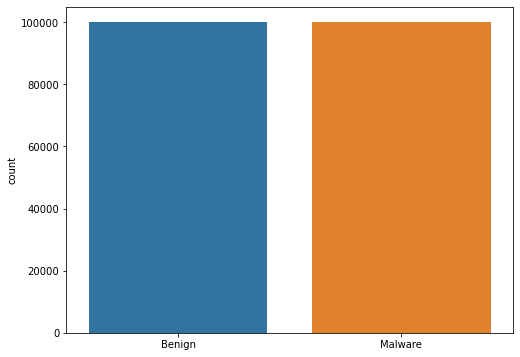

In [24]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(y_test)
ax.set_xticklabels(['Benign', 'Malware'])

In [3]:
# Normalization Data

normalize = MinMaxScaler()
normalize_features = normalize.fit_transform(X)
normalize_features_X = pd.DataFrame(normalize_features)

normalize_features_X.head()

0         1         2         3         4         5         6     \
0  0.056623  0.008114  0.024203  0.015924  0.021407  0.010883  0.017244   
1  0.006936  0.004553  0.014025  0.012579  0.012161  0.010599  0.013546   
2  0.020851  0.004755  0.012478  0.012872  0.011620  0.009461  0.012618   
3  0.006356  0.003866  0.011812  0.011262  0.010299  0.009263  0.012336   
4  0.022012  0.004019  0.011953  0.011270  0.010367  0.009216  0.011996   

       7         8         9     ...  2371  2372  2373  2374          2375  \
0  0.004507  0.076704  0.019155  ...   0.0   0.0   0.0   0.0  0.000000e+00   
1  0.005989  0.035548  0.013084  ...   0.0   0.0   0.0   0.0  2.801456e-08   
2  0.006327  0.031745  0.012594  ...   0.0   0.0   0.0   0.0  0.000000e+00   
3  0.005797  0.030801  0.011572  ...   0.0   0.0   0.0   0.0  3.268366e-08   
4  0.005687  0.030539  0.011539  ...   0.0   0.0   0.0   0.0  0.000000e+00   

       2376  2377  2378  2379  2380  
0  0.000000   0.0   0.0   0.0   0.0  
1  0.000004   0.0   0.0   0.0   0.0  
2  0.000000   0.0   0.0   0.0   0.0  
3  0.000004   0.0   0.0   0.0   0.0  
4  0.000000   0.0   0.0   0.0   0.0  

[5 rows x 2381 columns]

In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline 

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0,test_size=0.2)
X_trainf, X_testf, y_trainf, y_testf = train_test_split(scaled_features_X,y,stratify=y,random_state=0,test_size=0.2)
X_trainy, X_testy, y_trainy, y_testy = train_test_split(normalize_features_X,y,stratify=y,random_state=0,test_size=0.2)
# X_train, y_test = train_test_split(df,test_size=0.2)

# X_new = SelectKBest(chi2, k=10).fit_transform(X_train, y_train)

# X_new.shape

# X_train.isnull().sum().sum()

In [7]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook import tqdm

In [6]:
# Determine the mutual information


mutual_info = mutual_info_classif(X_trainy, y_trainy)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_trainy.columns
mutual_info.sort_values(ascending=False)

KeyboardInterrupt: 

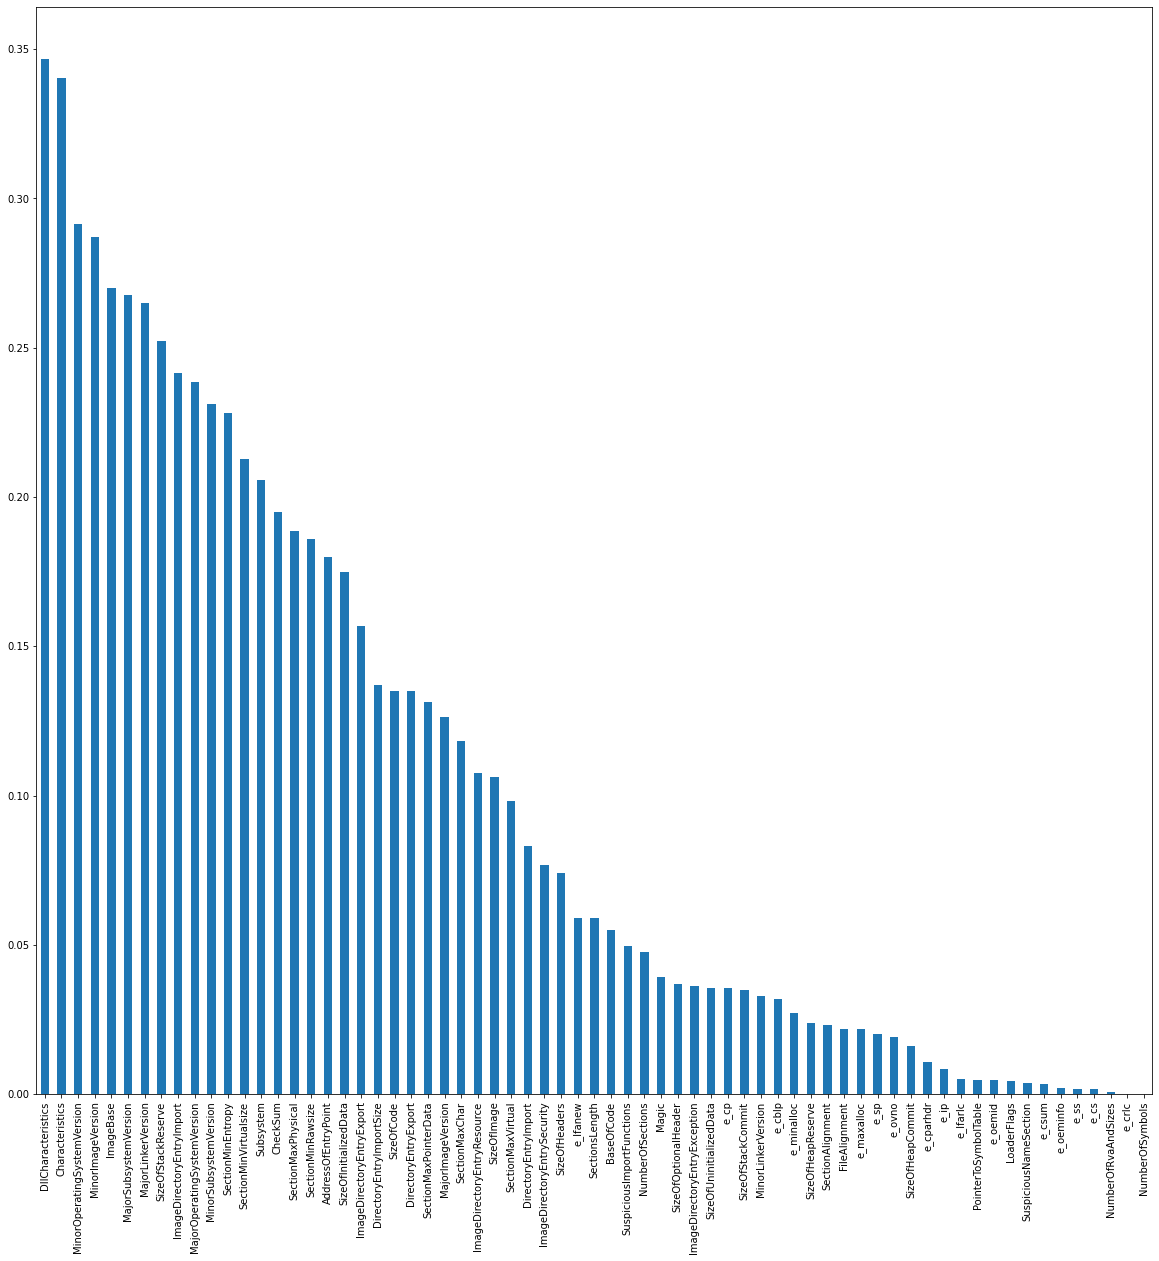

In [20]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,20))

In [21]:
## How to choose the best parameter for machine learning model that we use.

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(SVC(gamma='auto'), {
#     'C':[1,10,20],
#     'kernel': ['sigmoid','rbf', 'linear', 'poly']
# }, cv=5, return_train_score=False)
# clf.fit(X_trainf,y_trainf)
# clf.cv_results_

In [22]:
# clf.best_score_

In [23]:
# clf.best_params_

In [11]:
pip install jupyter_contrib_nbextensions

  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963419 sha256=14a792c40d5128fc5459cd72d5076671e8c78f74ae0523df34a9967ee76237e6
  Stored in directory: c:\users\fauzanhikmahramadhan\appdata\local\pip\cache\wheels\4d\ba\f4\b8c0941055519ebc0f27e85bfe2bb223f1a59a3b8bfc5c7515
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465846 sha256=0a6fb80e0c8dad14f320d6387babc0bba39539cddd54f4753a5d66570a8ef87c
  Stored in directory: c:\users\fauzanhikmahramadhan\appdata\local\pip\cache\wheels\e3\3a\b3\a709b437602c3807f079f0c35ccba3e1adf9af6f2e6b0ebfea
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
Note: you may need to restart the kernel to use updated packages.


In [ ]:
jupyter nbextension enable codefolding/main


In [24]:
# Adaboost, Gradient Boosting

AB = AdaBoostClassifier(random_state=0)
AB.fit(X_train,y_train)
AB_pred = AB.predict(X_test)
print('AdaBoost: \n')
print(classification_report(y_test, AB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,AB_pred)*100, "%")

GB = GradientBoostingClassifier(random_state=0)
GB.fit(X_train,y_train)
GB_pred = GB.predict(X_test)
print('GradienBoosting: \n')
print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_test,GB_pred)*100, "%")

AdaBoost: 

              precision    recall  f1-score   support

      Benign       0.97      0.92      0.94      1003
     Malware       0.97      0.99      0.98      2920

    accuracy                           0.97      3923
   macro avg       0.97      0.95      0.96      3923
weighted avg       0.97      0.97      0.97      3923

97.19602345144023 %
GradienBoosting: 

              precision    recall  f1-score   support

      Benign       0.99      0.94      0.97      1003
     Malware       0.98      1.00      0.99      2920

    accuracy                           0.98      3923
   macro avg       0.99      0.97      0.98      3923
weighted avg       0.98      0.98      0.98      3923

98.31761407086414 %


In [12]:
# Random Forest and SVM without Hybrid

RF = RandomForestClassifier(n_estimators = 110)
RF.fit(X_trainf,y_trainf)
RF_pred = RF.predict(X_testf)
print('Random Forest: \n')
print(classification_report(y_testf, RF_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_testf,RF_pred)*100, "%")
seed = None
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold)
print('Random Forest: \n',results.mean()*100, "%")


SVM = SVC(kernel='rbf',gamma='auto',probability=True,C=20)
SVM.fit(X_trainy,y_trainy)
SVM_pred = SVM.predict(X_testy)
print('Support Vector Machine: \n')
print(classification_report(y_testy, SVM_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_testy,SVM_pred)*100, "%")
seed = None
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(SVM, X_trainy, y_trainy, cv=kfold)



KeyboardInterrupt: 

In [26]:
# # Hybrid Ensemble Machine Learning


# estimators = []
# estimators.append(('RF1', RandomForestClassifier()))
# estimators.append(('SVM1', SVC(kernel='rbf')))
# hybrid = VotingClassifier(estimators)
# hybrid.fit(X_train, y_train)
# y1_pred = hybrid.predict(X_test)
# # cm_HybridEnsembler = confusion_matrix(y_test, y1_pred)
# # print(accuracy_score(y_test,y1_pred)*100, "%")

# #Cross-Validation
# seed = None
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# results = model_selection.cross_val_score(hybrid, X_train, y_train, cv=kfold)

# print('Hybrid Machine Learning: \n',results.mean()*100, "%")





In [27]:
# print('Hybrid Machine Learning: \n')
# print(classification_report(y_test, y1_pred, target_names=['Benign', 'Malware']))
# print(accuracy_score(y_test,y1_pred)*100, "%")

In [ ]:
%%time

# Hybrid Machine Learning Using Stacking Classifier

from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[RandomForestClassifier(n_estimators = 110),SVC(kernel='rbf',gamma='auto',probability=True,C=20)], meta_classifier=GradientBoostingClassifier(random_state=0))

for clf, label in zip([RandomForestClassifier(n_estimators = 110), SVC(kernel='rbf',gamma='auto',probability=True,C=20), sclf], ['Random Forest','Support Vector Machine','Stacking Classifier']):
  scores = model_selection.cross_val_score(clf, X_trainy, y_trainy, cv=10, scoring='accuracy')
  print("Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), label))

sclf.fit(X_trainy, y_trainy)
sclf_preds = sclf.predict(X_testy)

Accuracy: 0.9947 (+/- 0.0009) [Random Forest]


In [ ]:
print('Hybrid Machine Learning: \n')
print(classification_report(y_test, GB_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y_testf,sclf_pred)*100, "%")

In [ ]:
# Confusion Matrix

# for clf, label in zip([RF_pred, SVM_pred, sclf_preds], ['Random Forest','Support Vector Machine','Stacking Classifier']):
#   ax=sns.heatmap(confusion_matrix(clf, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
#   ax.set_xlabel('Predicted labels')
#   ax.set_ylabel('True labels')
#   ax.set_label(label)

# ax=sns.heatmap(confusion_matrix(sclf_preds, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Stacking Hybrid Machine Learning')

# ax1=sns.heatmap(confusion_matrix(RF_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax1.set_xlabel('Predicted labels')
# ax1.set_ylabel('True labels')
# ax1.set_label('Random Forest')

# ax2=sns.heatmap(confusion_matrix(SVM_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax2.set_xlabel('Predicted labels')
# ax2.set_ylabel('True labels')
# ax2.set_label('Support Vector Machine')

In [ ]:
# ax1=sns.heatmap(confusion_matrix(RF_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax1.set_xlabel('Predicted labels')
# ax1.set_ylabel('True labels')
# ax1.set_title('Random Forest')

In [ ]:
# ax2=sns.heatmap(confusion_matrix(SVM_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
# ax2.set_xlabel('Predicted labels')
# ax2.set_ylabel('True labels')
# ax2.set_title('Support Vector Machine')

In [ ]:
# # ROC Curve for Comparing Which One is The Best Machine Learning Model

# r_probs = [0 for _ in range(len(y_testf))]

# RF_probs = RF.predict_proba(X_test)
# SVM_probs = SVM.predict_proba(X_testf)
# sclf_probs = sclf.predict_proba(X_testf.values)

# RF_probs = RF_probs[:, 1]
# SVM_probs = SVM_probs[:, 1]
# sclf_probs = sclf_probs[:, 1]

# from sklearn.metrics import roc_curve, roc_auc_score

# r_auc = roc_auc_score(y_testf, r_probs)
# RF_auc = roc_auc_score(y_test, RF_probs)
# SVM_auc = roc_auc_score(y_testf, SVM_probs)
# sclf_auc = roc_auc_score(y_testf, sclf_probs)

# print('Random (chance) Prediction: AUROC = {:.3f}'.format(r_auc))
# print('Random Forest Prediction: AUROC = {:.3f}'.format(RF_auc))
# print('SVM Prediction: AUROC = {:.3f}'.format(SVM_auc))
# print('Hybrd Machine Learning Prediction: AUROC = {:.3f}'.format(sclf_auc))

In [ ]:
# r_fpr, r_tpr, _ = roc_curve(y_testf, r_probs)
# RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
# SVM_fpr, SVM_tpr, _ = roc_curve(y_testf, SVM_probs)
# sclf_fpr, sclf_tpr, _ = roc_curve(y_testf, sclf_probs)

# plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = {:.4f})'.format(r_auc))
# plt.plot(RF_fpr, RF_tpr, marker='.', label='Random  Forest prediction (AUROC = {:.4f})'.format(RF_auc))
# plt.plot(SVM_fpr, SVM_tpr, marker='.', label='Support Vector Machine prediction (AUROC = {:.4f})'.format(SVM_auc))
# plt.plot(sclf_fpr, sclf_tpr, marker='.', label='Hybrid Machine Learning Prediction (AUROC = {:.4f})'.format(sclf_auc))


# # Title
# plt.title('ROC plot')
# # Axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # Show legend
# plt.legend()
# # Show plot
# plt.show()

In [ ]:
# Plotting for Model Accuracy
plotting = []
plotting.append(accuracy_score(y_test,RF_pred)*100)
plotting.append(accuracy_score(y_test,SVM_pred)*100) 
plotting.append(accuracy_score(y_test,AB_pred)*100) 
plotting.append(accuracy_score(y_test,GB_pred)*100)
plotting.append(accuracy_score(y_testf,y1_pred)*100)
# plotting.append(results.mean()*100)  

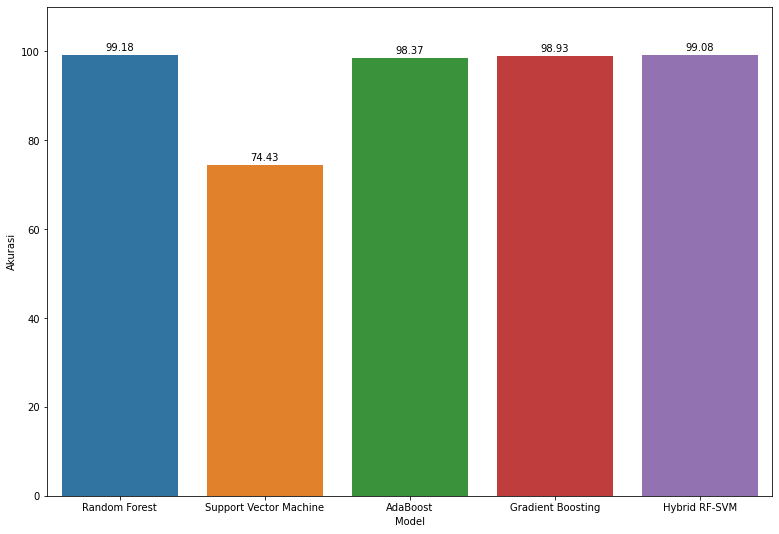

In [ ]:
plt.figure(figsize=(13, 9))
columns = ['Random Forest', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Hybrid RF-SVM']
models = pd.DataFrame (plotting, columns=['Akurasi'])
models['Model'] = columns
g = sns.barplot(x='Model', y='Akurasi', data=models)
for index, row in models.iterrows():
    g.text(row.name,row.Akurasi,round(row.Akurasi,2), color='black', ha="center", position=(row.name,(row.Akurasi + 1)))
g = g.set(ylim=(0,110))
plt.show()

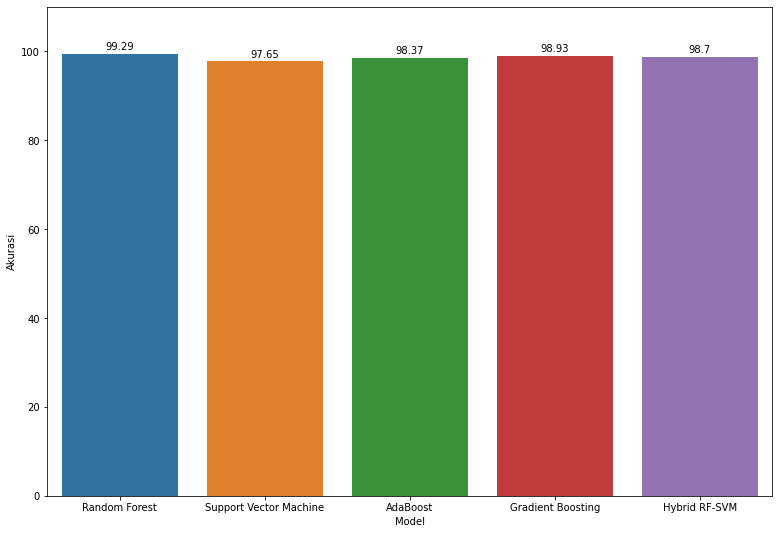

In [ ]:
import seaborn as sns


plt.figure(figsize=(13, 9))
columns = ['Random Forest', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Hybrid RF-SVM']
models = pd.DataFrame (plotting, columns=['Akurasi'])
models['Model'] = columns
g = sns.barplot(x='Model', y='Akurasi', data=models)
for index, row in models.iterrows():
    g.text(row.name,row.Akurasi,round(row.Akurasi,2), color='black', ha="center", position=(row.name,(row.Akurasi + 1)))
g = g.set(ylim=(0,110))
plt.show()

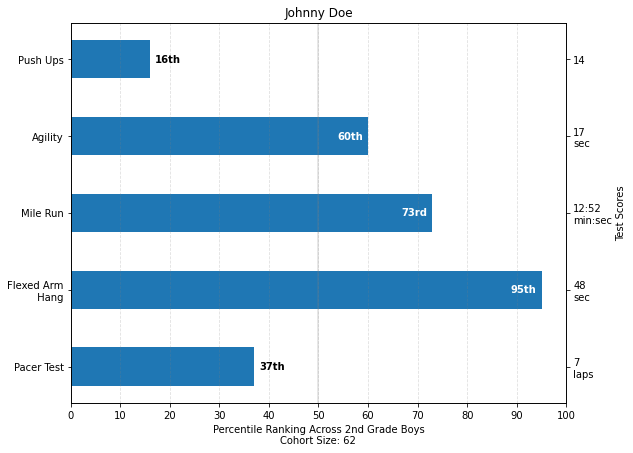

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_units = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score, test):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:  # If no unit, don't include a newline, so that label stays centered.
        return score


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7))  # Create the figure
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    # Set the tick locations
    ax2.set_yticks(pos)
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # Set the tick labels
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names])

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rank_str = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(
            rank_str, xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # Make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # Return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

In [ ]:
X_test[X_test['e_cblp'] == 144]

e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  \
13106     144     3       0          4           0       65535     0   184   
4225      144     3       0          4           0       65535     0   184   
3117      144     3       0          4           0       65535     0   184   
16252     144     3       0          4           0       65535     0   184   
10514     144     3       0          4           0       65535     0   184   
...       ...   ...     ...        ...         ...         ...   ...   ...   
28        144     3       0          4           0       65535     0   184   
14241     144     3       0          4           0       17744     0   332   
8204      144     3       0          4           0       65535     0   184   
13609     144     3       0          4           0       65535     0   184   
12827     144     3       0          4           0       65535     0   184   

       e_csum  e_ip   e_cs  e_lfarlc  e_ovno  e_oemid  e_oeminfo  e_lfanew  \
13106       0     0      0        64       0        0          0       224   
4225        0     0      0        64       0        0          0       232   
3117        0     0      0        64       0        0          0       160   
16252       0     0      0        64       0        0          0       224   
10514       0     0      0        64       0        0          0       232   
...       ...   ...    ...       ...     ...      ...        ...       ...   
28          0     0      0        64       0        0          0       248   
14241       2  1047  18293         0       0      267          6        12   
8204        0     0      0        64       0        0          0       128   
13609       0     0      0        64       0        0          0       208   
12827       0     0      0        64       0        0          0       224   

       Machine  NumberOfSections  TimeDateStamp  PointerToSymbolTable  \
13106    34404                 5     1374056757                     0   
4225       332                 4     1217413346                     0   
3117       332                 3     1117249724                     0   
16252      332                 5     1377144284                     0   
10514      332                 5     1394548398                     0   
...        ...               ...            ...                   ...   
28         332                 4     1160675868                     0   
14241      332                 2     1198851095                     0   
8204       332                 3     1400451477                     0   
13609      332                 6     1330111183                     0   
12827      332                 7     1363078305                     0   

       NumberOfSymbols  SizeOfOptionalHeader  Characteristics  Magic  \
13106                0                   240               35    523   
4225                 0                   224              259    267   
3117                 0                   224              271    267   
16252                0                   224             8450    267   
10514                0                   224              258    267   
...                ...                   ...              ...    ...   
28                   0                   224              259    267   
14241                0                   224              271    267   
8204                 0                   224              258    267   
13609                0                   224              258    267   
12827                0                   224              258    267   

       MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
13106                   8                   0       95232   
4225                    8                   0       12288   
3117                    6                   0      806912   
16252                  11                   0        4096   
10514                  11                   0       71168   
...                   ...

In [ ]:
# Hybrid Machine Learning

RF2 = RandomForestClassifier()
RF2.fit(X_train,y_train)
RF2_feature = RF2.feature_importances_
RF2_mean = np.mean(RF2_feature)
columns = X_test.columns.copy()
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, RF2.feature_importances_):
    feats[feature] = importance # add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
print(importances)





# val_input=pd.concat([X_test, pd.DataFrame(RF2_feature,columns = ['feature_importances']).set_index(X_test.index)],axis=1)

# print(val_input)

# RF2_pred = RF.predict(X_test)

# SVM2 = SVC(kernel='sigmoid',gamma='auto')
# SVM2.fit(X_train,y_train)
# SVM2_pred = SVM.predict(RF2.feature_importances_)

                              Gini-importance
e_cblp                               0.001834
e_cp                                 0.002273
e_crlc                               0.000016
e_cparhdr                            0.000601
e_minalloc                           0.000890
...                                       ...
ImageDirectoryEntryExport            0.013772
ImageDirectoryEntryImport            0.004769
ImageDirectoryEntryResource          0.003482
ImageDirectoryEntryException         0.001149
ImageDirectoryEntrySecurity          0.007977

[69 rows x 1 columns]


In [ ]:
datas = pd.DataFrame()
for columns in importances.index:
  if importances.loc[columns][0] > RF2_mean and columns != 'Malware':
    datas[columns] = scaled_features_X[columns]
datas.head()

TimeDateStamp  Characteristics  MajorLinkerVersion  SizeOfInitializedData  \
0      -0.160899        -0.580614           -0.078606              -0.028218   
1       0.275656        -0.557040            0.024473              -0.029047   
2       0.525738        -0.582719           -0.284765              -0.031009   
3       0.240078        -0.501790           -0.697082              -0.030882   
4       0.348717        -0.501790           -0.697082              -0.029867   

   ImageBase  MajorOperatingSystemVersion  MinorOperatingSystemVersion  \
0  -0.058173                    -0.018884                    -0.022178   
1  -0.067496                    -0.019964                    -0.022178   
2  -0.067496                    -0.021044                    -0.022178   
3  -0.067496                    -0.021044                    -0.022178   
4  -0.067496                    -0.021044                    -0.022178   

   MajorImageVersion  MinorImageVersion  MajorSubsystemVersion  \
0          -0.037225          -0.042078               0.283415   
1          -0.041990          -0.042078               0.283415   
2          -0.041990          -0.042078              -0.948422   
3          -0.037225          -0.042078              -0.948422   
4          -0.041196          -0.042078              -0.948422   

   MinorSubsystemVersion  SizeOfHeaders  CheckSum  Subsystem  \
0              -0.012984      -0.048297 -0.233040  -0.355026   
1              -0.015130      -0.048297 -0.233638  -0.355026   
2              -0.015130       0.171487 -0.233638  -0.355026   
3              -0.015130      -0.048297 -0.204962  -0.355026   
4              -0.015130      -0.048297 -0.233638  -0.355026   

   DllCharacteristics  SizeOfStackReserve  SectionMaxChar  \
0            0.894758           -0.399103        1.014413   
1            0.910370           -0.018495        1.071671   
2           -1.107499           -0.018495        0.098279   
3            0.890855            0.742721        0.103647   
4           -1.107499            0.742721        0.109015   

   DirectoryEntryImportSize  DirectoryEntryExport  
0                  0.394159               -0.0912  
1                  1.645403               -0.0912  
2                  0.583026               -0.0912  
3                  0.417768               -0.0912  
4                 -0.463612               -0.0912

In [ ]:
datas.shape

(19611, 19)

In [ ]:
df.shape

(19611, 70)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(datas,y,stratify=y,random_state=0,test_size=0.2)

SVM2 = SVC(kernel='sigmoid',gamma='auto')
SVM2.fit(X2_train,y2_train)
SVM2_pred = SVM2.predict(X2_test)
print(classification_report(y2_test, SVM2_pred, target_names=['Benign', 'Malware']))
print(accuracy_score(y2_test,SVM2_pred)*100, "%")


              precision    recall  f1-score   support

      Benign       0.77      0.74      0.75      1003
     Malware       0.91      0.92      0.92      2920

    accuracy                           0.88      3923
   macro avg       0.84      0.83      0.84      3923
weighted avg       0.87      0.88      0.88      3923

87.586031098649 %


In [ ]:
X2_train

TimeDateStamp  Characteristics  MajorLinkerVersion  \
2420       -1.951695         2.906252           -0.697082   
11414      -0.113684        -0.556935            0.024473   
15489       4.280345         0.281500            0.539869   
17468       0.669345         0.305073            0.539869   
9309        0.031581        -0.580509           -0.078606   
...              ...              ...                 ...   
4361       -0.725178         0.305073           -0.078606   
10414       0.418397        -0.557040            0.230631   
14552       0.293002        -0.557040            0.230631   
18041       0.316486        -0.557040            0.230631   
13386       0.348624        -0.557040            0.024473   

       SizeOfInitializedData  ImageBase  MajorOperatingSystemVersion  \
2420               -0.031279  -0.067496                    -0.021044   
11414              -0.030958  -0.067496                    -0.019964   
15489              -0.030848  -0.053507                    -0.014564   
17468              -0.031169  -0.066921                    -0.019964   
9309                0.047133  -0.055840                    -0.021044   
...                      ...        ...                          ...   
4361               -0.030400  -0.066921                    -0.021044   
10414              -0.006852  -0.067496                    -0.019964   
14552              -0.019620  -0.067496                    -0.019964   
18041              -0.030155  -0.067496                    -0.018884   
13386              -0.025750  -0.067496                    -0.019964   

       MinorOperatingSystemVersion  MajorImageVersion  MinorImageVersion  \
2420                     -0.022178          -0.041990          -0.042078   
11414                    -0.022178          -0.041990          -0.042078   
15489                    -0.022178          -0.034049          -0.042078   
17468                    -0.020948          -0.038020          -0.036435   
9309                     -0.022178          -0.041990          -0.042078   
...                            ...                ...                ...   
4361                     -0.022178          -0.041990          -0.042078   
10414                    -0.020948          -0.041990          -0.042078   
14552                    -0.020948          -0.038020          -0.041137   
18041                    -0.018486          -0.037225          -0.039256   
13386                    -0.022178          -0.041990          -0.042078   

       MajorSubsystemVersion  MinorSubsystemVersion  SizeOfHeaders  CheckSum  \
2420               -0.948422              -0.015130       0.171487 -0.233638   
11414              -0.948422              -0.015130      -0.048297  0.060125   
15489               1.515251              -0.015130      -0.048297 -0.233406   
17468               0.283415              -0.014057      -0.048297 -0.233638   
9309                0.283415              -0.012984      -0.048297 -0.233638   
...                      ...                    ...            ...       ...   
4361               -0.948422              -0.015130       0.171487 -0.233344   
10414               0.283415              -0.014057      -0.048297 -0.229766   
14552               0.283415              -0.014057      -0.048297 -0.231662   
18041               1.515251              -0.011911      -0.048297 -0.232461   
13386               0.283415              -0.015130      -0.048297  3.849429   

       Subsystem  DllCharacteristics  SizeOfStackReserve  SectionMaxChar  \
2420   -0.355026           -1.107499           -0.018495        1.014413   
11414  -0.355026            0.968916           -0.018495        0.098279   
15489   1.707909           -0.086855           -0.589407        0.098279   
17468  -0.355026           -1.087984           -0.018495        0.098279   
9309   -0.355026            0.890855           -0.018495        0.098279   
...          ...                 ...                 ...             ...   
436

In [ ]:
X1_test.shape

NameError: ignored

In [ ]:
# nge cek cara pakai .loc yang benar

# importances.loc[['e_cblp']]
# importances.loc['e_cblp'][0]

In [ ]:
df.head()

In [ ]:
print(X_test.shape, RF2_feature.shape)

(3923, 69) (69,)


In [ ]:
importances.index

Index(['e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc',
       'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno',
       'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine', 'NumberOfSections',
       'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes',
       'SuspiciousImportFunctions', 'S

In [ ]:
df.columns


Index(['e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc',
       'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno',
       'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine', 'NumberOfSections',
       'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       'SuspiciousImportFun

In [ ]:
datas = df[importances.index].copy()

In [ ]:
datas

e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  \
0         144     3       0          4           0       65535     0   184   
1         144     3       0          4           0       65535     0   184   
2         144     3       0          4           0       65535     0   184   
3         144     3       0          4           0       65535     0   184   
4         144     3       0          4           0       65535     0   184   
...       ...   ...     ...        ...         ...         ...   ...   ...   
19606     144     3       0          4           0       65535     0   184   
19607     144     3       0          4           0       65535     0   184   
19608       0     0       0          0           0           0     0     0   
19609     144     3       0          4           0       65535     0   184   
19610     144     3       0          4           0       65535     0   184   

       e_csum  e_ip  e_cs  e_lfarlc  e_ovno  e_oemid  e_oeminfo  e_lfanew  \
0           0     0     0        64       0        0          0       248   
1           0     0     0        64       0        0          0       240   
2           0     0     0        64       0        0          0       256   
3           0     0     0        64       0        0          0       128   
4           0     0     0        64       0        0          0       128   
...       ...   ...   ...       ...     ...      ...        ...       ...   
19606       0     0     0        64       0        0          0       240   
19607       0     0     0        64       0        0          0       264   
19608       0     0     0        64       0        0          0       128   
19609       0     0     0        64       0        0          0       224   
19610       0     0     0        64       0        0          0       240   

       Machine  NumberOfSections  TimeDateStamp  PointerToSymbolTable  \
0        34404                 6     1236512358                     0   
1          332                 5     1365109591                     0   
2          332                 6     1438777028                     0   
3          332                 7     1354629311                     0   
4          332                 7     1386631250                     0   
...        ...               ...            ...                   ...   
19606      332                 5     1377143713                     0   
19607      332                 5     1501777476                     0   
19608      332                 4     1377135839                     0   
19609      332                 5     1377141725                     0   
19610      332                 6     1377139145                     0   

       NumberOfSymbols  SizeOfOptionalHeader  Characteristics  Magic  \
0                    0                   240               34    523   
1                    0                   224              258    267   
2                    0                   224               14    267   
3                    0                   224              783    267   
4                    0                   224              783    267   
...                ...                   ...              ...    ...   
19606                0                   224              258    267   
19607                0                   224              258    267   
19608                0                   224             8450    267   
19609                0                   224             8450    267   
19610                0                   224             8450    267   

       MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                       8                   0       54784   
1                       9                   0      205824   
2                       6                   0       24576   
3                       2                  22       34304   
4                       2                  56        8192   
...                   ...            

In [ ]:
RF2_feature = RF2.feature_importances_

In [ ]:
used_feature = []
for feature in RF2.feature_importances_:
  if feature > np.mean(RF.feature_importances):
    used_feature.append(feature)

In [ ]:
importance = np.mean(RF2_feature)
importance

0.014492753623188404

In [ ]:
RF2_feature

array([2.09129997e-03, 2.74534560e-03, 1.51667010e-05, 7.75070082e-04,
       1.76384508e-03, 2.18469523e-03, 7.73617178e-08, 2.31321236e-03,
       1.03907476e-05, 2.09240817e-04, 6.25672517e-06, 2.90153119e-05,
       1.84951532e-04, 1.08029334e-04, 1.87357880e-04, 8.69351588e-03,
       2.14755195e-03, 2.77790787e-03, 6.74252337e-02, 1.77125650e-04,
       2.56375292e-04, 6.45069796e-04, 5.15691015e-02, 1.95628640e-03,
       6.55268777e-02, 2.36185728e-03, 4.17847787e-03, 2.65223813e-02,
       8.31317398e-04, 6.80521552e-03, 3.83176682e-03, 2.89238164e-02,
       5.47049988e-03, 1.69864216e-03, 7.82129133e-02, 8.91689700e-02,
       1.78106441e-02, 3.18151027e-02, 8.75690565e-02, 7.40436569e-02,
       1.02459748e-02, 1.51343101e-02, 1.13792106e-02, 6.40160161e-02,
       2.69625651e-02, 5.41139412e-02, 2.34483604e-03, 1.88397966e-03,
       7.69935147e-04, 1.38917534e-04, 3.08641823e-05, 3.86887245e-03,
       3.11092979e-05, 3.65775782e-03, 1.11501737e-02, 8.18296023e-03,
      

In [ ]:
for features in RF2_feature:
    if(features > importance):
      print(features)

0.06742523367819213
0.05156910153288255
0.065526877654142
0.026522381339101
0.02892381643479138
0.07821291328325357
0.08916896998727389
0.017810644089872693
0.031815102689947125
0.08756905651841089
0.07404365687959545
0.015134310125117395
0.06401601609220178
0.026962565134944418
0.05411394118036732
0.017169194662010494
0.0248792839948628


In [ ]:
X_train.shape

In [ ]:
RF_pred.shape

In [ ]:
train_X,val_X,train_y,val_y=train_test_split(X_train,y_train,stratify=y_train,test_size=0.2,random_state=0)
# val_y.isnull().sum().sum()

In [ ]:
columns=X.columns

In [ ]:
# SVM

model1=SVC(kernel='sigmoid',gamma='auto')
model1.fit(train_X,train_y)
y_val_pred1=model1.predict(val_X)
y_val_pred1=pd.DataFrame(y_val_pred1)
y_test_pred1=model1.predict(X_test)
y_test_pred1=pd.DataFrame(y_test_pred1)
# y_val_pred1.isnull().sum()

In [ ]:
val_input=pd.concat([pd.DataFrame(val_X,columns=columns),y_val_pred1.set_index(val_X.index)],axis=1)
test_input=pd.concat([pd.DataFrame(X_test,columns=columns),y_test_pred1.set_index(X_test.index)],axis=1)

In [ ]:
model=RandomForestClassifier(n_estimators=300)
model.fit(val_input,val_y)

In [ ]:
print((model.score(test_input,y_test))*100, "%")

In [ ]:
test_input.shape

In [ ]:
y_test.shape

In [ ]:
SVM_pred.shape

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# score = cross_val_score(RF,X,y,cv=KFold(20))

In [ ]:
# score

In [ ]:
# score.mean()

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

# # clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# svm = SVC(gamma='auto')
# svm.fit(X, y)

In [ ]:
# RF.predict(X_test)

In [ ]:
# RF.score(X_test, y_test)

In [ ]:
# from sklearn.model_selection import cross_validate

In [ ]:
# from sklearn.inspection import permutation_importance

# hasil = permutation_importance(RF,X_test,y_test,random_state=0)
# hasil = hasil.importances

In [ ]:
# print(hasil.shape)


In [ ]:
# hasil[:,0]

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

import random
from pprint import pprint

from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy

def bootstrapping(train_df, n_bootstrap):
  bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
  df_bootstrapped = train_df.iloc[bootstrap_indices]

  return df_bootstrapped

In [ ]:
bootstrapping(X_train, n_bootstrap = 1000).duplicated()[:200]

In [ ]:
def get_potential_splits(data, random_subspace):
  potential_splits = {}
  _, n_columns = data.shape
  column_indices = list(range(n_columns - 1))
  
  if random_subspace and random_subspace <= len(column_indices):
    column_indices = random.sample(population=column_indices, k=random_subspace)

  for column_index in column_indices:
    values = data[:, column_index]
    unique_values = np.unique(values)

    potential_splits[column_index] = unique_values
  
  return potential_splits

In [ ]:
get_potential_splits(X_train.values, random_subspace=6)

In [ ]:
def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
  forest = []
  for i in range(n_trees):
    df_bootstrapped = bootstrapping(train_df, n_bootstrap)
    tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
    forest.append(tree)

  return forest

def random_forest_predictions(test_df, forest):
  df_predictions = {}
  for i in range(len(forest)):
    column_name = "tree_{}".format(i)
    predictions = decision_tree_predictions(test_df, tree=forest[i])
    df_predictions[column_name] = predictions

  df_predictions = pd.DataFrame(df_predictions)
  random_forest_predictions = df_predictions.mode(axis=1)[0]

In [ ]:
forest = random_forest_algorithm(X_train, n_trees=4, n_bootstrap=800, n_features=4, dt_max_depth=4)

In [ ]:
predictions = random_forest_predictions(y_test, forest)

In [ ]:
accuracy = calculate_accuracy(predictions, y_test.Malware)
print("Accuracy = {}".format(accuracy))

In [ ]:
df.dropna(inplace = True)

In [ ]:
# Random Forest Algorithm on Sonar Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini
 
# Select the best split point for a dataset
def get_split(dataset, n_features):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	features = list()
	while len(features) < n_features:
		index = randrange(len(dataset[0])-1)
		if index not in features:
			features.append(index)
	for index in features:
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left, n_features)
		split(node['left'], max_depth, min_size, n_features, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right, n_features)
		split(node['right'], max_depth, min_size, n_features, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
	root = get_split(train, n_features)
	split(root, max_depth, min_size, n_features, 1)
	return root
 
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']
 
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
	sample = list()
	n_sample = round(len(dataset) * ratio)
	while len(sample) < n_sample:
		index = randrange(len(dataset))
		sample.append(dataset[index])
	return sample
 
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
	predictions = [predict(tree, row) for tree in trees]
	return max(set(predictions), key=predictions.count)
 
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
	trees = list()
	for i in range(n_trees):
		sample = subsample(train, sample_size)
		tree = build_tree(sample, max_depth, min_size, n_features)
		trees.append(tree)
	predictions = [bagging_predict(trees, row) for row in test]
	return(predictions)
 
# Test the random forest algorithm
seed(2)
# load and prepare data
# filename = 'sonar.all-data.csv'
# dataset = load_csv(filename)
# # convert string attributes to integers
# for i in range(0, len(dataset[0])-1):
# 	str_column_to_float(dataset, i)
# # convert class column to integers
# str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(df[0])-1))
for n_trees in [1, 5, 10]:
	scores = evaluate_algorithm(df, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
	print('Trees: %d' % n_trees)
	print('Scores: %s' % scores)
	print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

In [ ]:
# from sklearn import datasets
# import numpy as np
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# X = X[y != 0, :2]
# y = y[y != 0]

In [ ]:
# from sklearn.svm import SVC

# n_sample = len(X)
# X_Train = X[:int(.9 * n_sample)]
# y_Train = y[:int(.9 * n_sample)]
# X_Test = X[int(.9 * n_sample):]
# y_Test = y[int(.9 * n_sample):]


# svc = SVC(kernel= 'poly')
# svc.fit(X_Train, y_Train)
# svc.predict(X_Test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=0)
# X = [[ 1,  2,  3],  # 2 samples, 3 features
#      [11, 12, 13]]
# y = [0, 1]  # classes of each sample
# clf.fit(X, y)

In [ ]:
# clf.predict([[4, 5, 10], [12, 13, 12], [1, 2, 3]])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = [[0, 15],
#      [1, -10]]
# # scale data according to computed scaling values
# StandardScaler().fit_transform(X)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# legit = df[df['Malware'] == 0]
# malware = df[df['Malware'] == 1]

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate

In [ ]:
# data_in = df.drop('Name',axis=1).values
# labels = df['Malware'].values

# data_in